# Solución rotante dRGT

La solución de agujero negro rotante se obtuvo aplicando el algorítmo de Janis-Newman sobre la solución estática. A continuación se muestran los resultados numéricos estudiados para la solución y los gráfcos obtenidos.

Inicialmente, se cargan los módulos que se usarán para el código, dentro de ellos ```funcionesUtiles``` un código propio para algunas funciones que se repiten a lo largo del código.

In [1]:
import numpy as np
import matplotlib.pyplot as mp
import sympy as sp
from sympy import simplify, Eq, cos, sin, diff
from funcionesUtiles import *
sp.init_printing()

Module FuncionesUtiles was charged


# 1. Definición de las coordenadas y métrica

Inicialmente, se definen las coordenadas donde se trabajará, en este caso coordenadas esféricas. También se inicializan los parámetros, parametros muy similares a los del caso estático, sin embargo aparece el parámetro de espín $a$ y algunos como $\rho$ que son propios de las métricas rotantes.

In [2]:
t,r,theta,phi, p, a = sp.symbols("t r \\theta \\phi \\rho a")
Lambda,gamma,zeta = sp.symbols(r"\Lambda \gamma \zeta")
m, alpha, beta, m_g, c = sp.symbols(r" m \alpha \beta m_g \epsilon")
coords = [t,r,theta,phi]
params = [m_g, m, c, alpha, beta, a]

Nuevamente, los parámetros $\Lambda$, $\gamma$ y $\zeta$ dependen de los parámetros $\alpha$, $\beta$, $m_g$ y $\epsilon$ como sigue.

In [3]:
Lambda = -3*m_g**2*(1+alpha+beta)
display(Lambda)

In [4]:
gamma = -c*m_g**2*(1+2*alpha+3*beta)
display(gamma)

In [5]:
zeta = c**2*m_g**2*(alpha + 3*beta)
zeta

## 1.1. Métrica

La métrica as resultante para el agujero negro rotante queda descrita según los siguientes términos:

In [12]:
f=1-(1/p**2)*(2*m*r+(Lambda/3)*r**4-gamma*r**3-zeta*r**2)
Delta = p**2*f+a**2*sin(theta)**2

g=sp.Matrix([[0 for i in range(4)] for i in range(4)])
g[0,0] = -simplify(f)
g[1,1] = simplify(p**2/Delta)
g[2,2] = simplify(p**2)
g[3,3] = simplify((p**2+(2-f)*a**2*sin(theta)**2)*sin(theta)**2)
g[0,3] = simplify(a*sin(theta)**2*(f-1))
g[3,0] = g[0,3]
g

⎡   ⎛        2    2  2                                  2  3                  
⎢  -⎝\epsilon ⋅m_g ⋅r ⋅(\alpha + 3⋅\beta) - \epsilon⋅m_g ⋅r ⋅(2⋅\alpha + 3⋅\be
⎢  ───────────────────────────────────────────────────────────────────────────
⎢                                                                     2       
⎢                                                                 \rho        
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                   0         
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

Esta métrica recupera la métrica de la solución estática, cuando $a \rightarrow 0$, como se muestra a continuación

In [13]:
simplify(g.subs(p**2,r**2+a**2*cos(theta)**2).subs(a,0))

⎡          2    2                                    2  2                     
⎢- \epsilon ⋅m_g ⋅r⋅(\alpha + 3⋅\beta) + \epsilon⋅m_g ⋅r ⋅(2⋅\alpha + 3⋅\beta 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                            r                
⎢                                                                             
⎢                                                                             
⎢                                                            0                
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                            0                
⎢                                                   

Recuperando también entonces el agujero de Schwarszchild cuando $m_g\rightarrow 0$ también.

# 2. Horizonte de eventos

El horizonte de eventos de la solución rotante viene dado por 
\begin{equation} \Delta = 0, \end{equation}
es decir, 
\begin{equation} -\dfrac{\Lambda}{3}r^4+\gamma r^3+(\zeta+1)r^2-2Mr+a^2=0 \end{equation}.

En términos de $\alpha$ y $\beta$ queda escrito como:

In [8]:
FHorizonte0 = p**2*f+a**2*sin(theta)**2
FHorizonte0=sp.collect(simplify(sp.expand(FHorizonte0.subs(p**2,r**2+a**2*cos(theta)**2))),r)
FHorizonte0

Por simplicidad, nuevamente se tomara $m_g=1$ y $\epsilon=1$, obteniendo el siguiente resultado

In [9]:
FHorizonte = sp.collect(simplify(subs(FHorizonte0,(p**2,r**2+a**2*cos(theta)**2),(m_g,1),(c,1))),r)
FHorizonte

## 2.1. Número de soluciones de horizonte de eventos en el espacio $(\alpha-\beta)$

Debido a que depende de $\alpha$ y $\beta$ se puede realizar un análisis similar al caso anterior para diferentes valores de $a$ para las regiones de $\alpha-\beta$. Por simplicidad en las ecuaciones se tomo también $M=1$.

In [12]:
alphas=np.linspace(-10,15,100)
betas=np.linspace(-1,6,100)

Inicialmente se calculó le número de soluciones que se obtienen al tomar $a=0.2$, mostrado en la figura siguiente:

In [72]:
sols_M1_a1 = findSolutions(f=subs(FHorizonte,(a,0.2),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

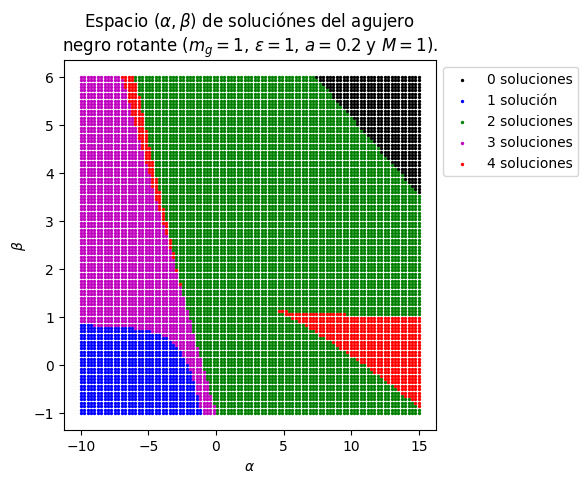

In [73]:
plot(sols_M1_a1,0.2,1)

Luego se tomó $a=0.25$ obteniendo el siguiente grafico.

In [13]:
sols_M1_a2 = findSolutions(f=subs(FHorizonte,(a,0.25),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

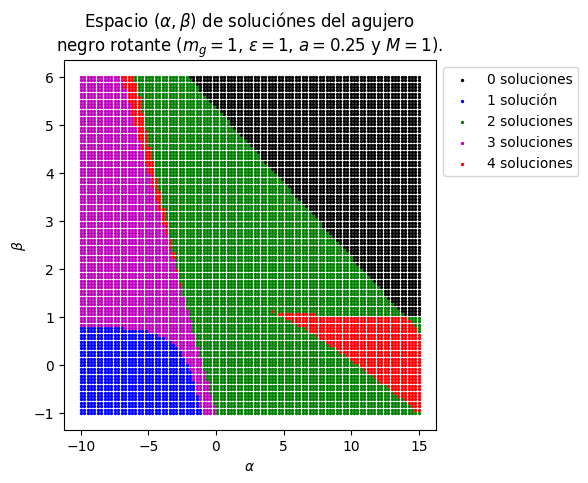

In [14]:
plot(sols_M1_a2,0.25,1)

Posteriormente, se tomo el valor de $a=0,35$.

In [15]:
sols_M1_a3=findSolutions(f=subs(FHorizonte,(a,0.35),(m,1)),
                        maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

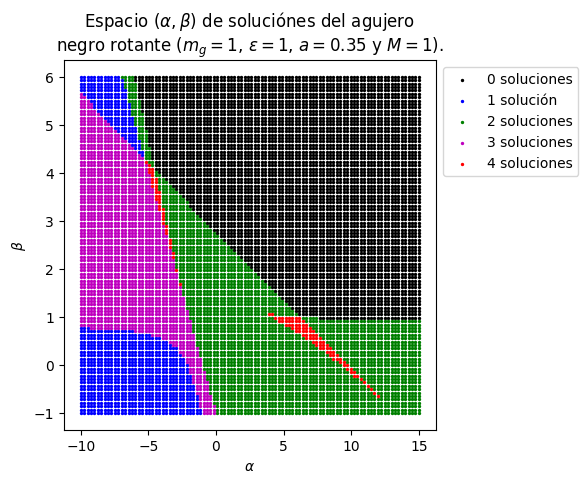

In [16]:
plot(sols_M1_a3,0.35,1)

Ahora se tomo un $a=0.5$, obteniendo la siguiente gráfica

In [17]:
sols_M1_a4 = findSolutions(f=subs(FHorizonte,(a,0.5),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

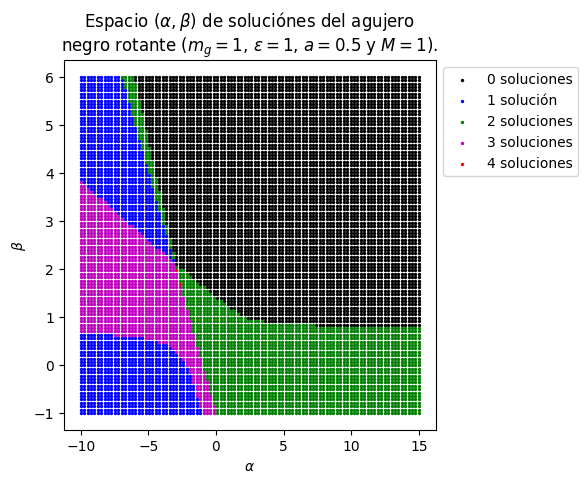

In [18]:
plot(sols_M1_a4,0.5,1)

Ahora, se tomo el valor extremo del caso de Kerr, es decir $a=1$, obteniendo lo siguiente

In [13]:
sols_M1_a4 = findSolutions(f=subs(FHorizonte,(a,1),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

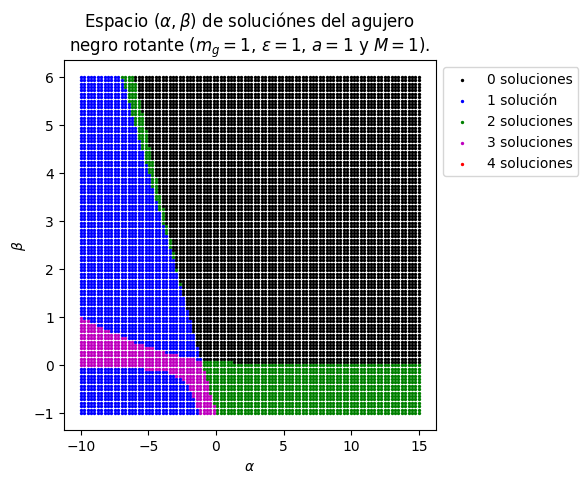

In [71]:
plot(sols_M1_a4, 1,1)

En el cual se puede notar que aún hay zonas con más de una solución posible.

En los siguientes calculos se tomaron valores superiores de $a>1$, es decir, agujeros negros super rotantes. Inicialmente, $a=1.5$, obteniendo soluciones de agujeros negros super rotantes.

In [68]:
sols_M1_a5 = findSolutions(f=subs(FHorizonte,(a,1.5),(m,1)),
                           maxNumOfSols=4,domAndArray=[alpha,alphas],imgAndArray=[beta,betas])

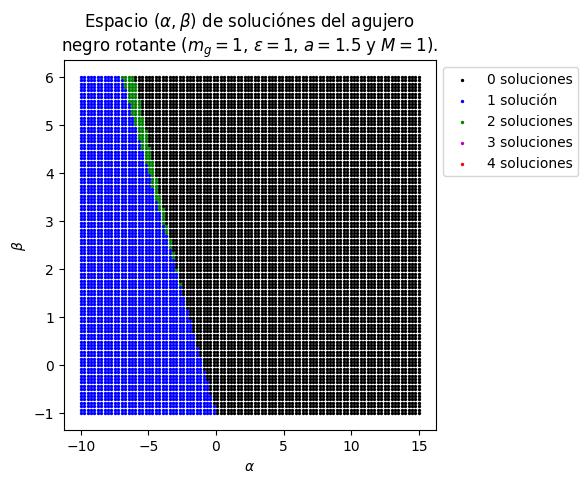

In [69]:
plot(sols_M1_a5, 1.5,1)

## 2.2. Comportamiento de la función $\Delta(r)$

Para conocer mejor el comportamiento de los horizontes respecto del valor de $\alpha$ y $\beta$ es posible graficar el comportamiento de $\Delta(r)$, para lo cual se obtuvieron las siguientes gráficas, resultado de cambiar el valor de $a$.

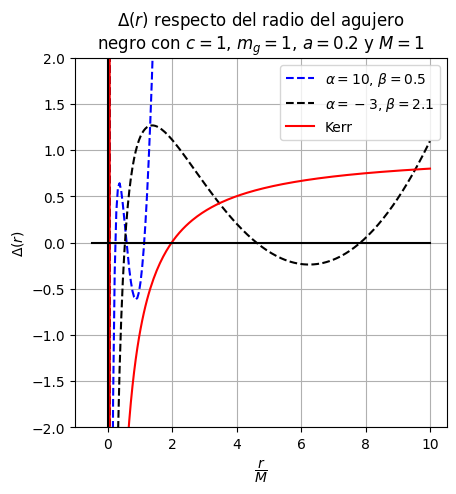

In [10]:
r_graf=np.linspace(0.01,10,200)
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.2))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.2))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.2))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=0.2$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

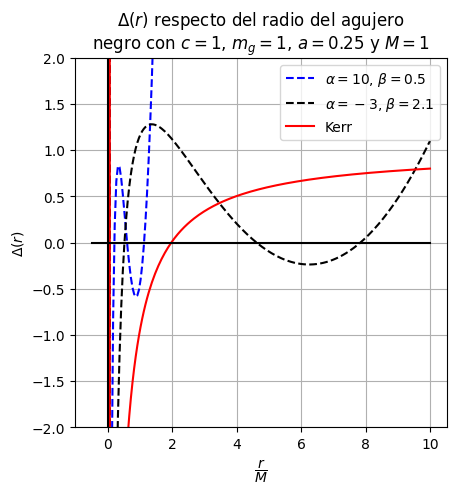

In [11]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=0.25$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

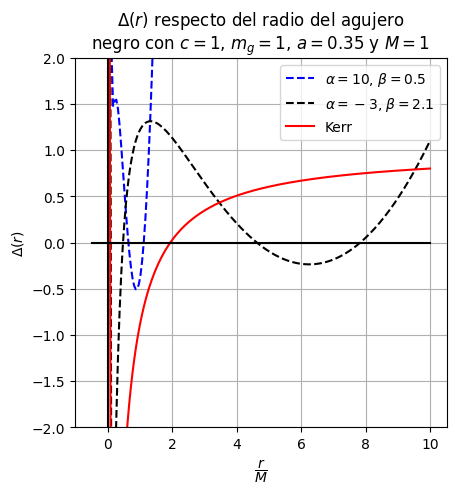

In [12]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.35))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.35))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.35))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=0.35$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

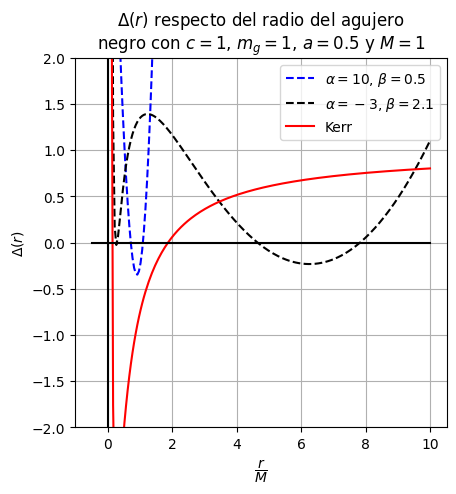

In [13]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.5))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.5))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.5))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=0.5$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

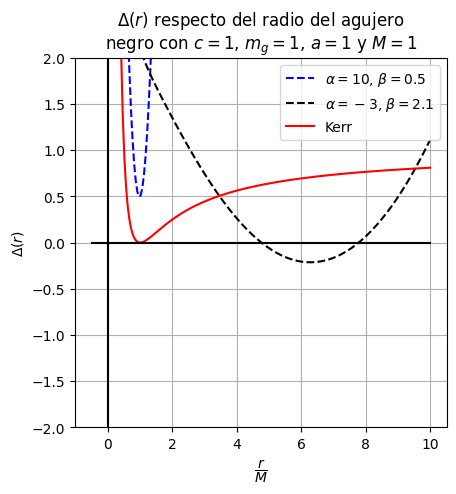

In [14]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=1$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

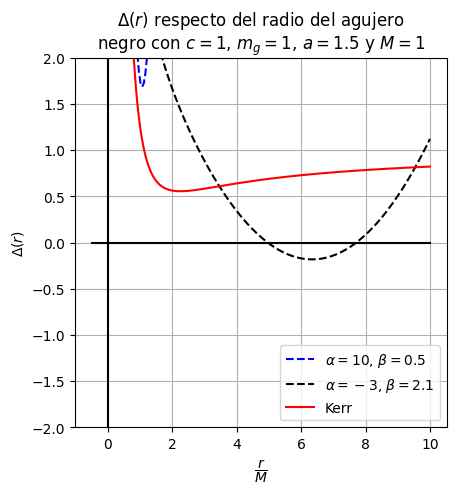

In [15]:
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1.5))),10,0.5,r_graf,coords,params),"b--", label=r"$\alpha=10$, $\beta=0.5$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1.5))),-3,2.1,r_graf,coords,params),"k--", label=r"$\alpha=-3$, $\beta=2.1$")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,1.5))),0,0,r_graf,coords,params,m_gVal=0),"r-",label="Kerr")
mp.ylim(-2,2)
#mp.xlim(-0.5,5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=1.5$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-2,2],"k-")

Adicionalmente, se comprobó el comportamiento de la función $\Delta$ en diferentes regiones de $\alpha$ y $\beta$ como se muestra a continuación:

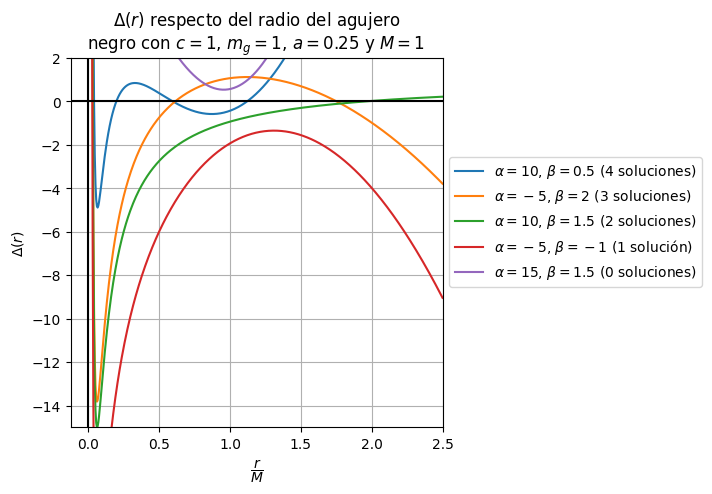

In [45]:
r_graf = np.linspace(0.001,2.5,500)
mp.figure(figsize=(4.8, 4.8))
mp.grid(True)
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),10,0.5,r_graf,coords,params), label=r"$\alpha=10$, $\beta=0.5$ (4 soluciones)")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),-5,2,r_graf,coords,params), label=r"$\alpha=-5$, $\beta=2$ (3 soluciones)")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),10,1.5,r_graf,coords,params,m_gVal=0),label=r"$\alpha=10$, $\beta=1.5$ (2 soluciones)")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),-5,-1,r_graf,coords,params), label=r"$\alpha=-5$, $\beta=-1$ (1 solución)")
mp.plot(*graf(simplify(subs(FHorizonte0/r**2,(a,0.25))),15,1.5,r_graf,coords,params), label=r"$\alpha=15$, $\beta=1.5$ (0 soluciones)")
mp.ylim(-15,2)
mp.xlim(-0.125,2.5)
mp.ylabel("$\\Delta(r)$")
mp.xlabel(r"$\dfrac{r}{M}$")
mp.title("$\Delta(r)$ respecto del radio del agujero\nnegro con $c=1$, $m_g=1$, $a=0.25$ y $M=1$")
mp.legend()
mp.plot([-0.5,10],[0,0],"k-")
mp.plot([0,0],[-20,2],"k-")
mp.legend(bbox_to_anchor=(1,0.75))

# 3. Ergosfera

La ergosfera es la hipersuperficie donde se satisface la ecuación 

\begin{equation}
    g_{tt} = 0 = -\dfrac{\Lambda}{3}r^4+\gamma r^3+(\zeta+1)r^2+-2Mra^2\cos^2\theta,
\end{equation}

expresión que también depende de $\alpha$ y $\beta$, como sigue

In [10]:
Ergo = sp.collect(simplify(subs(p**2*g[0,0],(p**2,r**2+a**2*cos(theta)**2))),r**2)
Ergo

In [11]:
thetas = np.linspace(0,2)*np.pi

Resolviendo la ecuación anterior se obtienen las siguientes gráficas para agujeros negros con $M=1$, pero distintos valores de $a$, $\alpha$ y $\beta$:

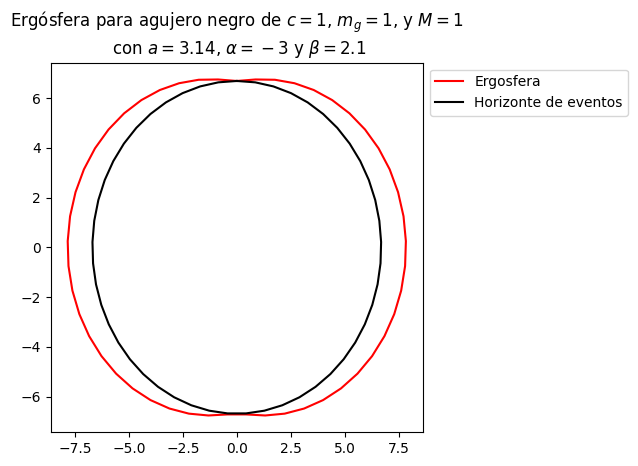

In [12]:
mp.figure(figsize=(4.8, 4.8))
alphaVal = -3
betaVal = 2.1
aVal = 3.14
x,y,rHorizon = Ergosphere(Ergo,FHorizonte0,thetas,alphaVal,betaVal,aVal,coords,params)
mp.plot(y,x,c="r", label = "Ergosfera")
mp.plot(rHorizon*np.sin(thetas),rHorizon*np.cos(thetas),c="k",label = "Horizonte de eventos")
mp.title(f"Ergósfera para agujero negro de $c=1$, $m_g=1$, y $M=1$\n con $a={aVal}$, $\\alpha ={alphaVal}$ y $\\beta = {betaVal}$")
mp.legend()
mp.legend(bbox_to_anchor=(1,1))

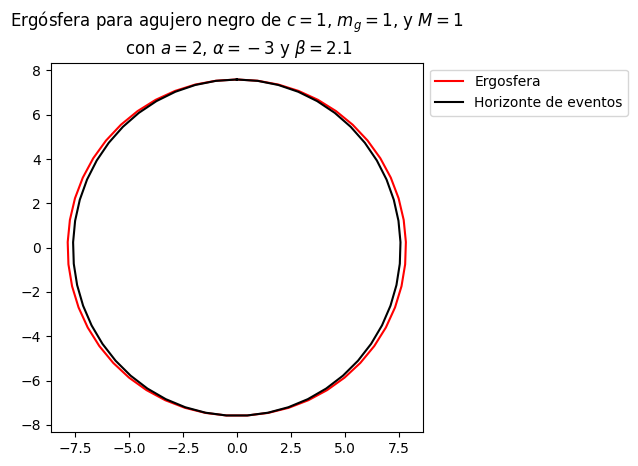

In [13]:
mp.figure(figsize=(4.8, 4.8))
alphaVal = -3
betaVal = 2.1
aVal = 2
x,y,rHorizon = Ergosphere(Ergo,FHorizonte0,thetas,alphaVal,betaVal,aVal,coords,params)
mp.plot(y,x,c="r", label = "Ergosfera")
mp.plot(rHorizon*np.sin(thetas),rHorizon*np.cos(thetas),c="k",label = "Horizonte de eventos")
mp.title(f"Ergósfera para agujero negro de $c=1$, $m_g=1$, y $M=1$\n con $a={aVal}$, $\\alpha ={alphaVal}$ y $\\beta = {betaVal}$")
mp.legend()
mp.legend(bbox_to_anchor=(1,1))

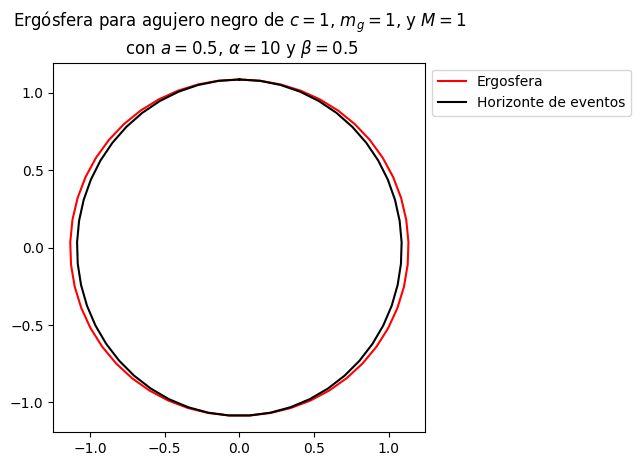

In [14]:
mp.figure(figsize=(4.8, 4.8))
alphaVal = 10
betaVal = 0.5
aVal = 0.5
x,y,rHorizon = Ergosphere(Ergo,FHorizonte0,thetas,alphaVal,betaVal,aVal,coords,params)
mp.plot(y,x,c="r", label = "Ergosfera")
mp.plot(rHorizon*np.sin(thetas),rHorizon*np.cos(thetas),c="k",label = "Horizonte de eventos")
mp.title(f"Ergósfera para agujero negro de $c=1$, $m_g=1$, y $M=1$\n con $a={aVal}$, $\\alpha ={alphaVal}$ y $\\beta = {betaVal}$")
mp.legend()
mp.legend(bbox_to_anchor=(1,1))

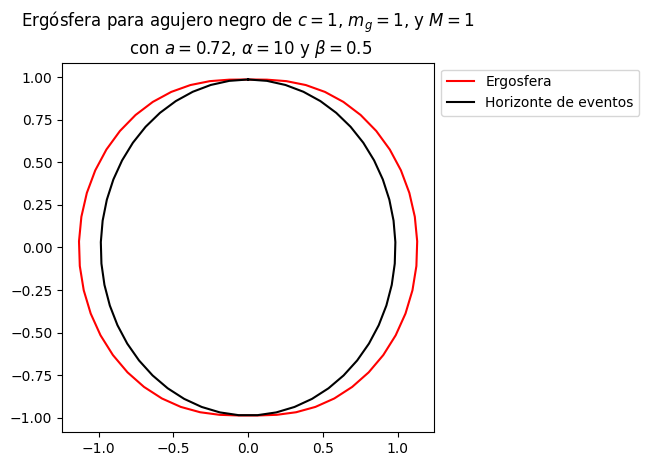

In [15]:
mp.figure(figsize=(4.8, 4.8))
alphaVal = 10
betaVal = 0.5
aVal = 0.72
x,y,rHorizon = Ergosphere(Ergo,FHorizonte0,thetas,alphaVal,betaVal,aVal,coords,params)
mp.plot(y,x,c="r", label = "Ergosfera")
mp.plot(rHorizon*np.sin(thetas),rHorizon*np.cos(thetas),c="k",label = "Horizonte de eventos")
mp.title(f"Ergósfera para agujero negro de $c=1$, $m_g=1$, y $M=1$\n con $a={aVal}$, $\\alpha ={alphaVal}$ y $\\beta = {betaVal}$")
mp.legend()
mp.legend(bbox_to_anchor=(1,1))

# 4. Temperatura

La temperatura del agujero negro queda determinada según la siguiente expresión 

\begin{align}
    T= &\dfrac{1}{4\pi}\dfrac{-\Lambda r_i^4+2\gamma r_i^3+(\zeta+1)r_i^2-a^2}{(r_i^2+a^2)r_i}\notag \\ 
    =&\dfrac{1}{4\pi}\dfrac{\alpha(3r_i^4-4r_i^3+r^2_i)+\beta(3r_i^4-6r_i^3+3r_i^2)+(3r_i^4-2r_i^3+r_i^2-a^2)}{(r_i^2+a^2)r_i}.\label{eq:TempRotating}
\end{align}


In [16]:
aes = [0.1, 0.25, 1, 2.5]
alphas = [-0.01, 0.01]
betas = [-0.01, 0.01]
rs = np.linspace(10e-3,3,500)

In [17]:
Temperature = [[] for i in range(4)]
num = 0
for i in range(len(alphas)):
    for j in range(len(betas)):
        Temperature[num]=[temp(params,rs,alphas[i],betas[j],aes[k]) for k in range(len(aes))]
        num += 1

Usando diferentes combianaciones de $\alpha$ y $\beta$ se puede graficar el comportamiento de la temperatura respecto del horizonte de eventos.

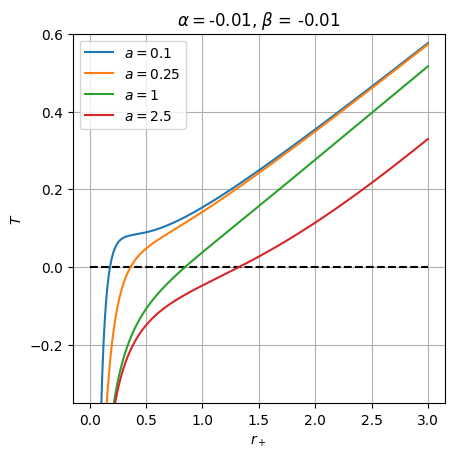

In [18]:
num = 0

mp.figure(figsize=(4.8, 4.8))
mp.plot([0,3],[0,0],"k--")
mp.grid(True)
for T in Temperature[0]:
    mp.plot(rs,T, label = f"$a={aes[num]}$")
    num+=1

mp.title(f"$\\alpha=${alphas[0]}, $\\beta$ = {betas[0]}")
mp.xlabel("$r_+$")
mp.ylabel("$T$")
mp.ylim(-0.35,0.6)
mp.legend()

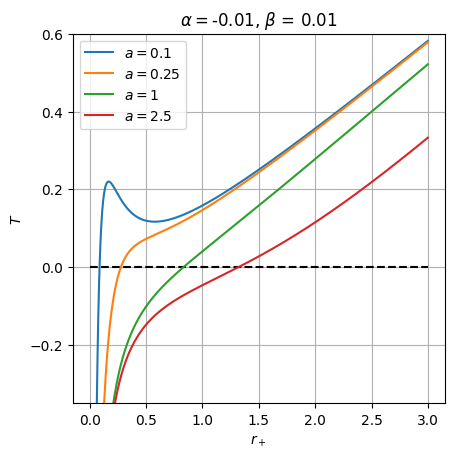

In [81]:
num = 0

mp.figure(figsize=(4.8, 4.8))
mp.plot([0,3],[0,0],"k--")
mp.grid(True)
for T in Temperature[1]:
    mp.plot(rs,T, label = f"$a={aes[num]}$")
    num+=1
mp.title(f"$\\alpha=${alphas[0]}, $\\beta$ = {betas[1]}")
mp.xlabel("$r_+$")
mp.ylabel("$T$")
mp.ylim(-0.35,0.6)
mp.legend()

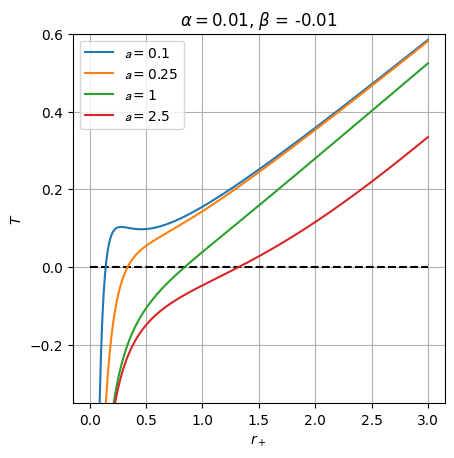

In [82]:
num = 0

mp.figure(figsize=(4.8, 4.8))
mp.plot([0,3],[0,0],"k--")
mp.grid(True)
for T in Temperature[2]:
    mp.plot(rs,T, label = r"$\mathcal{a}=$"+str(aes[num]))
    num+=1
mp.title(f"$\\alpha=${alphas[1]}, $\\beta$ = {betas[0]}")
mp.xlabel("$r_+$")
mp.ylabel("$T$")
mp.ylim(-0.35,0.6)
mp.legend()

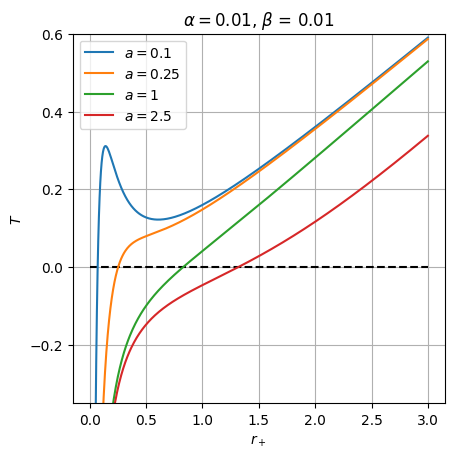

In [83]:
num = 0

mp.figure(figsize=(4.8, 4.8))
mp.plot([0,3],[0,0],"k--")
mp.grid(True)
for T in Temperature[3]:
    mp.plot(rs,T, label = f"$a={aes[num]}$")
    num+=1
mp.title(f"$\\alpha=${alphas[1]}, $\\beta$ = {betas[1]}")
mp.xlabel("$r_+$")
mp.ylabel("$T$")
mp.ylim(-0.35,0.6)
mp.legend()